## Importar datos

In [1]:
# Librerias
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

In [4]:
df = pd.read_csv('../../Data/school_dropout.csv', sep=';')

In [5]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.0,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666.666.666.666.600,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.0,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.4,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.0,0,13.9,-0.3,0.79,Graduate


## Eliminar columnas a priori poco relevantes

In [6]:
eliminar = [
    'Application order',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (without evaluations)'
]

df = df.drop(columns=eliminar)

## Ver si hay nulos (no hay)

In [7]:
df.isna().sum().sum()

0

In [8]:
df.head()

,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
0,1,8,2,1,1,1,13,10,6,10,...,0,0,0.0,0,0,0.0,10.8,1.4,1.74,Dropout
1,1,6,11,1,1,1,1,3,4,4,...,6,6,14.0,6,6,13.666.666.666.666.600,13.9,-0.3,0.79,Graduate
2,1,1,5,1,1,1,22,27,10,10,...,6,0,0.0,6,0,0.0,10.8,1.4,1.74,Dropout
3,1,8,15,1,1,1,23,27,6,4,...,6,6,13.428.571.428.571.400,6,5,12.4,9.4,-0.8,-3.12,Graduate
4,2,12,3,0,1,1,22,28,10,10,...,6,5,12.333.333.333.333.300,6,6,13.0,13.9,-0.3,0.79,Graduate


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Marital status                       4424 non-null   int64  
 1   Application mode                     4424 non-null   int64  
 2   Course                               4424 non-null   int64  
 3   Daytime/evening attendance           4424 non-null   int64  
 4   Previous qualification               4424 non-null   int64  
 5   Nacionality                          4424 non-null   int64  
 6   Mother's qualification               4424 non-null   int64  
 7   Father's qualification               4424 non-null   int64  
 8   Mother's occupation                  4424 non-null   int64  
 9   Father's occupation                  4424 non-null   int64  
 10  Displaced                            4424 non-null   int64  
 11  Educational special needs     

## Cambiar nombre columnas

In [10]:
df.rename(columns = {"Nacionality": "Nationality", 
                           "Mother's qualification": "Mother_qualification", 
                           "Father's qualification": "Father_qualification", 
                           "Mother's occupation": "Mother_occupation",
                           "Father's occupation": "Father_occupation", 
                           "Age at enrollment": "Age"}, inplace = True)

df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')

## Cambiar int a category

In [11]:
col = ['Marital_status', 'Application_mode', 'Course',
      'Daytime/evening_attendance', 'Previous_qualification', 'Nationality',
       'Mother_qualification', 'Father_qualification', 'Mother_occupation',
       'Father_occupation', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
      'International', 'Target']

df[col] = df[col].astype('category')

In [12]:
df.head()

,Marital_status,Application_mode,Course,Daytime/evening_attendance,Previous_qualification,Nationality,Mother_qualification,Father_qualification,Mother_occupation,Father_occupation,...,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Unemployment_rate,Inflation_rate,GDP,Target
0,1,8,2,1,1,1,13,10,6,10,...,0,0,0.0,0,0,0.0,10.8,1.4,1.74,Dropout
1,1,6,11,1,1,1,1,3,4,4,...,6,6,14.0,6,6,13.666.666.666.666.600,13.9,-0.3,0.79,Graduate
2,1,1,5,1,1,1,22,27,10,10,...,6,0,0.0,6,0,0.0,10.8,1.4,1.74,Dropout
3,1,8,15,1,1,1,23,27,6,4,...,6,6,13.428.571.428.571.400,6,5,12.4,9.4,-0.8,-3.12,Graduate
4,2,12,3,0,1,1,22,28,10,10,...,6,5,12.333.333.333.333.300,6,6,13.0,13.9,-0.3,0.79,Graduate


## Convertir formato de la nota media del semestre

In [13]:
df[['Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade']].head()

,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade
0,0.0,0.0
1,14.0,13.666.666.666.666.600
2,0.0,0.0
3,13.428.571.428.571.400,12.4
4,12.333.333.333.333.300,13.0


In [14]:
def convertir_formato(grade):
    try:
        # Intentar convertir el valor a float para manejar valores correctamente formateados
        return float(grade)
    except ValueError:
        # Si el valor no es convertible directamente, convertirlo a float y luego redondear a 1 decimal
        # Extracción del primer valor significativo antes de convertirlo
        return round(float(grade.split('.')[0] + '.' + grade.split('.')[1][:1]), 1)

# Aplicar la función a las columnas 'Curricular units 1st sem (grade)' y 'Curricular units 2nd sem (grade)'
df['Curricular_units_1st_sem_grade'] = df['Curricular_units_1st_sem_grade'].apply(convertir_formato)
df['Curricular_units_2nd_sem_grade'] = df['Curricular_units_2nd_sem_grade'].apply(convertir_formato)

In [15]:
df.head()

,Marital_status,Application_mode,Course,Daytime/evening_attendance,Previous_qualification,Nationality,Mother_qualification,Father_qualification,Mother_occupation,Father_occupation,...,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Unemployment_rate,Inflation_rate,GDP,Target
0,1,8,2,1,1,1,13,10,6,10,...,0,0,0.0,0,0,0.0,10.8,1.4,1.74,Dropout
1,1,6,11,1,1,1,1,3,4,4,...,6,6,14.0,6,6,13.6,13.9,-0.3,0.79,Graduate
2,1,1,5,1,1,1,22,27,10,10,...,6,0,0.0,6,0,0.0,10.8,1.4,1.74,Dropout
3,1,8,15,1,1,1,23,27,6,4,...,6,6,13.4,6,5,12.4,9.4,-0.8,-3.12,Graduate
4,2,12,3,0,1,1,22,28,10,10,...,6,5,12.3,6,6,13.0,13.9,-0.3,0.79,Graduate


In [16]:
# Encontrar valores que superan 20 en 'Curricular units 1st sem (grade)'
valores_mayores_1st_sem = df[df['Curricular_units_1st_sem_grade'] > 20]

# Encontrar valores que superan 20 en 'Curricular units 2nd sem (grade)'
valores_mayores_2nd_sem = df[df['Curricular_units_2nd_sem_grade'] > 20]

# Mostrar los resultados
print("Valores mayores a 20 en 'Curricular_units_1st_sem_grade':")
print(valores_mayores_1st_sem[['Curricular_units_1st_sem_grade']].head())

print("\nValores mayores a 20 en 'Curricular_units_2nd_sem_grade':")
print(valores_mayores_2nd_sem[['Curricular_units_2nd_sem_grade']].head())

Valores mayores a 20 en 'Curricular_units_1st_sem_grade':
     Curricular_units_1st_sem_grade
21                          114.375
130                         132.375
412                         115.875
446                         144.125
559                         125.075

Valores mayores a 20 en 'Curricular_units_2nd_sem_grade':
     Curricular_units_2nd_sem_grade
139                         175.875
171                         135.625
215                         133.125
224                         149.125
240                         114.625


In [17]:
def ajustar(grade):
    if pd.notna(grade) and grade > 20:
        # Desplazar el decimal un lugar a la izquierda
        return grade / 10
    return grade

# Aplicar la función a las columnas de calificaciones
df['Curricular_units_1st_sem_grade'] = df['Curricular_units_1st_sem_grade'].apply(ajustar)
df['Curricular_units_2nd_sem_grade'] = df['Curricular_units_2nd_sem_grade'].apply(ajustar)

# Redondear a un decimal
df['Curricular_units_1st_sem_grade'] = df['Curricular_units_1st_sem_grade'].round(1)
df['Curricular_units_2nd_sem_grade'] = df['Curricular_units_2nd_sem_grade'].round(1)

In [18]:
# Nota media máxima 1er semestre
df['Curricular_units_1st_sem_grade'].describe()

count    4424.000000
mean       10.310601
std         5.028960
min         0.000000
25%        10.800000
50%        12.200000
75%        13.300000
max        18.900000
Name: Curricular_units_1st_sem_grade, dtype: float64

In [19]:
# Nota media máxima 2nd semestre
df['Curricular_units_2nd_sem_grade'].describe()

count    4424.000000
mean        9.834155
std         5.388056
min         0.000000
25%        10.300000
50%        12.000000
75%        13.200000
max        18.500000
Name: Curricular_units_2nd_sem_grade, dtype: float64

In [20]:
df.head()

,Marital_status,Application_mode,Course,Daytime/evening_attendance,Previous_qualification,Nationality,Mother_qualification,Father_qualification,Mother_occupation,Father_occupation,...,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Unemployment_rate,Inflation_rate,GDP,Target
0,1,8,2,1,1,1,13,10,6,10,...,0,0,0.0,0,0,0.0,10.8,1.4,1.74,Dropout
1,1,6,11,1,1,1,1,3,4,4,...,6,6,14.0,6,6,13.6,13.9,-0.3,0.79,Graduate
2,1,1,5,1,1,1,22,27,10,10,...,6,0,0.0,6,0,0.0,10.8,1.4,1.74,Dropout
3,1,8,15,1,1,1,23,27,6,4,...,6,6,13.4,6,5,12.4,9.4,-0.8,-3.12,Graduate
4,2,12,3,0,1,1,22,28,10,10,...,6,5,12.3,6,6,13.0,13.9,-0.3,0.79,Graduate


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Marital_status                     4424 non-null   category
 1   Application_mode                   4424 non-null   category
 2   Course                             4424 non-null   category
 3   Daytime/evening_attendance         4424 non-null   category
 4   Previous_qualification             4424 non-null   category
 5   Nationality                        4424 non-null   category
 6   Mother_qualification               4424 non-null   category
 7   Father_qualification               4424 non-null   category
 8   Mother_occupation                  4424 non-null   category
 9   Father_occupation                  4424 non-null   category
 10  Displaced                          4424 non-null   category
 11  Educational_special_needs          4424 non

In [22]:
df.loc[(df['Curricular_units_1st_sem_approved'] == 0) & (df['Target'] == 'Graduated')]

,Marital_status,Application_mode,Course,Daytime/evening_attendance,Previous_qualification,Nationality,Mother_qualification,Father_qualification,Mother_occupation,Father_occupation,...,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Unemployment_rate,Inflation_rate,GDP,Target


## Convertir variable objetivo en binaria 
#### (ya que toma tres valores: Dropout, Graduate, Enrolled)

In [23]:
df['Dropout'] = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)
df = df.drop('Target', axis=1)
df['Dropout'] = df['Dropout'].astype('category')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Marital_status                     4424 non-null   category
 1   Application_mode                   4424 non-null   category
 2   Course                             4424 non-null   category
 3   Daytime/evening_attendance         4424 non-null   category
 4   Previous_qualification             4424 non-null   category
 5   Nationality                        4424 non-null   category
 6   Mother_qualification               4424 non-null   category
 7   Father_qualification               4424 non-null   category
 8   Mother_occupation                  4424 non-null   category
 9   Father_occupation                  4424 non-null   category
 10  Displaced                          4424 non-null   category
 11  Educational_special_needs          4424 non

## Correlaciones

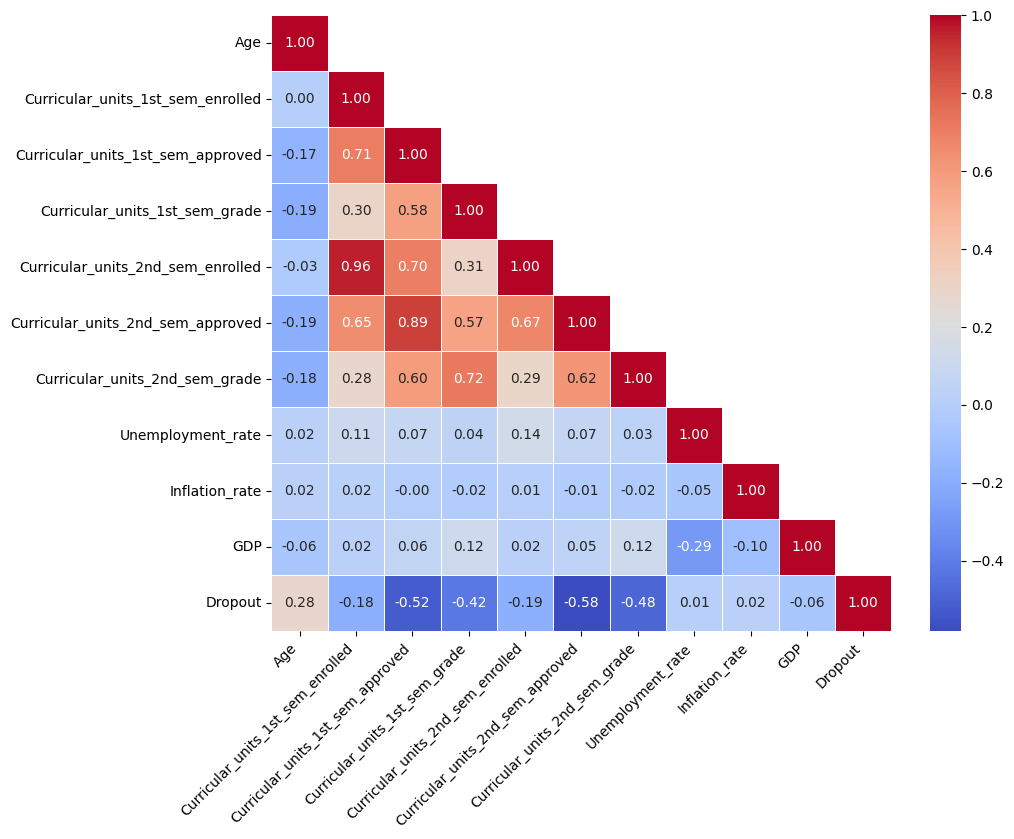

In [25]:
var_numericas = df[['Age', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_approved', 
                          'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_enrolled',
                          'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
                          'Unemployment_rate', 'Inflation_rate', 'GDP', 'Dropout']]

mask = np.triu(np.ones_like(var_numericas.corr(method = 'spearman'), dtype=bool), 1)

plt.figure(figsize=(10, 8))
sns.heatmap(var_numericas.corr(method = 'spearman'), mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45, ha='right')
plt.show()

## Crear dos nuevas variables: 'promedio de calificaciones' y 'ratio de aprobados'

In [26]:
# Crear las variables promediadas de calificaciones y ratio de aprobados
df['Avg_grade'] = df[['Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade']].mean(axis=1)

# Crear la nueva variable 'Approved_Ratio' como el ratio de unidades aprobadas entre unidades matriculadas
df['Approved_ratio'] = (df[['Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_approved']].sum(axis=1) /
                        df[['Curricular_units_1st_sem_enrolled', 'Curricular_units_2nd_sem_enrolled']].sum(axis=1))

df['Approved_ratio'] = df['Approved_ratio'].fillna(0)
df['Approved_ratio'] = df['Approved_ratio'].round(2)

# Eliminar las columnas originales si ya no son necesarias
df.drop(columns=['Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_approved', 
                 'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_enrolled',
                 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade'], inplace=True)

# Mostrar las primeras filas del DataFrame con las nuevas variables
df.head()

,Marital_status,Application_mode,Course,Daytime/evening_attendance,Previous_qualification,Nationality,Mother_qualification,Father_qualification,Mother_occupation,Father_occupation,...,Gender,Scholarship_holder,Age,International,Unemployment_rate,Inflation_rate,GDP,Dropout,Avg_grade,Approved_ratio
0,1,8,2,1,1,1,13,10,6,10,...,1,0,20,0,10.8,1.4,1.74,1,0.00,0.00
1,1,6,11,1,1,1,1,3,4,4,...,1,0,19,0,13.9,-0.3,0.79,0,13.80,1.00
2,1,1,5,1,1,1,22,27,10,10,...,1,0,19,0,10.8,1.4,1.74,1,0.00,0.00
3,1,8,15,1,1,1,23,27,6,4,...,0,0,20,0,9.4,-0.8,-3.12,0,12.90,0.92
4,2,12,3,0,1,1,22,28,10,10,...,0,0,45,0,13.9,-0.3,0.79,0,12.65,0.92


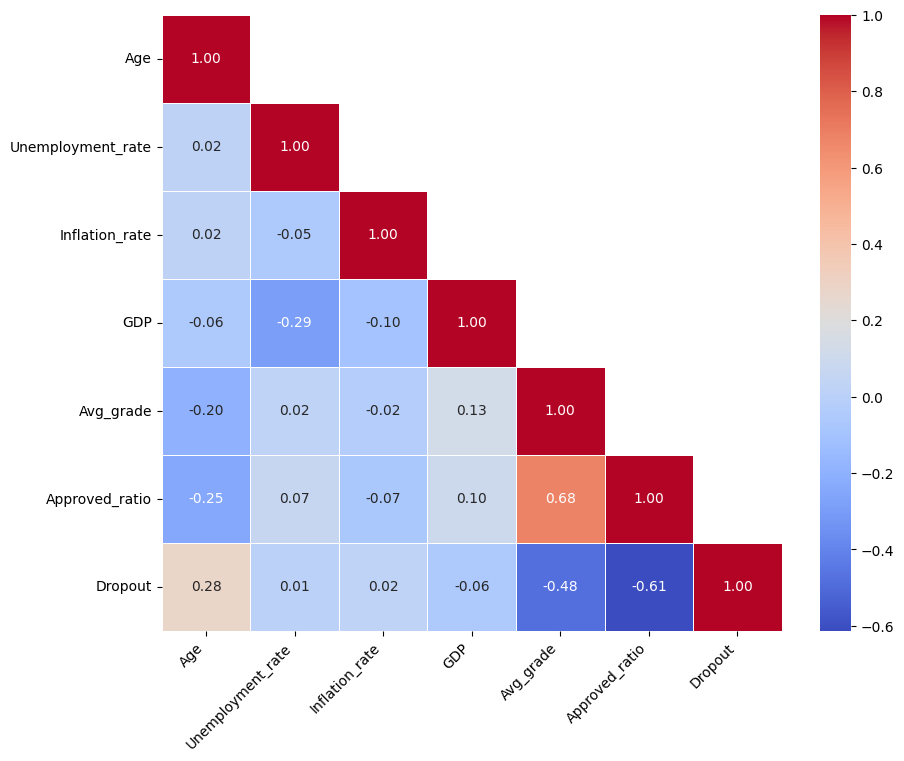

In [27]:
var_numericas = df[['Age', 'Unemployment_rate', 'Inflation_rate', 'GDP', 'Avg_grade', 'Approved_ratio', 'Dropout']]

mask = np.triu(np.ones_like(var_numericas.corr(method = 'spearman'), dtype=bool), 1)

plt.figure(figsize=(10, 8))
sns.heatmap(var_numericas.corr(method = 'spearman'), mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\mjdiaz\AppData\Local\Temp\ipykernel_44972\1242449361.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dropout', y='Approved_ratio', data=df, palette='Set2')
C:\Users\mjdiaz\AppData\Local\Temp\ipykernel_44972\1242449361.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dropout', y='Avg_grade', data=df, palette='Set2')


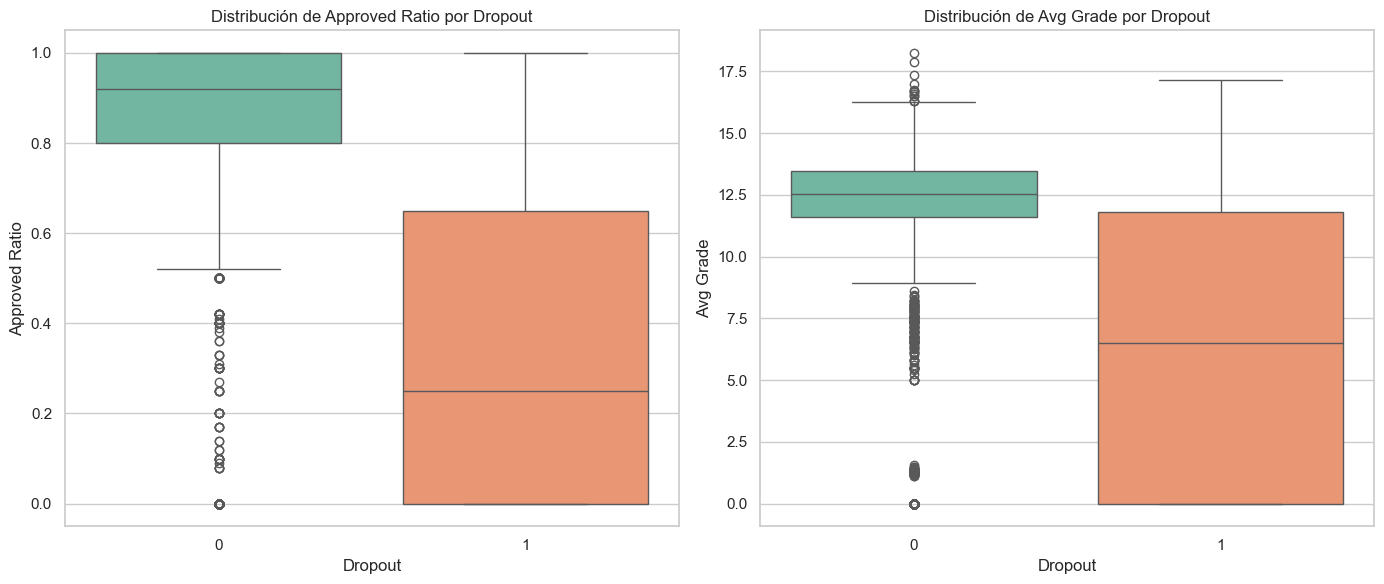

In [28]:
# Establecer el estilo de la visualización
sns.set(style="whitegrid")

# Crear una figura con dos subgráficas (uno para cada boxplot)
plt.figure(figsize=(14, 6))

# Boxplot para Approved_ratio
plt.subplot(1, 2, 1)
sns.boxplot(x='Dropout', y='Approved_ratio', data=df, palette='Set2')
plt.title('Distribución de Approved Ratio por Dropout')
plt.xlabel('Dropout')
plt.ylabel('Approved Ratio')

# Boxplot para Avg_grade
plt.subplot(1, 2, 2)
sns.boxplot(x='Dropout', y='Avg_grade', data=df, palette='Set2')
plt.title('Distribución de Avg Grade por Dropout')
plt.xlabel('Dropout')
plt.ylabel('Avg Grade')

# Ajustar el espacio entre subgráficas
plt.tight_layout()

# Mostrar los boxplots
plt.show()

In [29]:
df[(df['Avg_grade'] == 0) & (df['Dropout'] == '0')]

,Marital_status,Application_mode,Course,Daytime/evening_attendance,Previous_qualification,Nationality,Mother_qualification,Father_qualification,Mother_occupation,Father_occupation,...,Gender,Scholarship_holder,Age,International,Unemployment_rate,Inflation_rate,GDP,Dropout,Avg_grade,Approved_ratio


## Convertir categóricas a dummies

In [30]:
categoricas = [ 'Marital_status', 'Application_mode', 'Course', 'Daytime/evening_attendance', 'Previous_qualification', 
               'Nationality', 'Mother_qualification', 'Father_qualification', 'Mother_occupation', 'Father_occupation', 
               'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
               'International']

In [31]:
df = pd.get_dummies(df, columns=categoricas)
df.head()

,Age,Unemployment_rate,Inflation_rate,GDP,Dropout,Avg_grade,Approved_ratio,Marital_status_1,Marital_status_2,Marital_status_3,...,Debtor_0,Debtor_1,Tuition_fees_up_to_date_0,Tuition_fees_up_to_date_1,Gender_0,Gender_1,Scholarship_holder_0,Scholarship_holder_1,International_0,International_1
0,20,10.8,1.4,1.74,1,0.00,0.00,True,False,False,...,True,False,False,True,False,True,True,False,True,False
1,19,13.9,-0.3,0.79,0,13.80,1.00,True,False,False,...,True,False,True,False,False,True,True,False,True,False
2,19,10.8,1.4,1.74,1,0.00,0.00,True,False,False,...,True,False,True,False,False,True,True,False,True,False
3,20,9.4,-0.8,-3.12,0,12.90,0.92,True,False,False,...,True,False,False,True,True,False,True,False,True,False
4,45,13.9,-0.3,0.79,0,12.65,0.92,False,True,False,...,True,False,False,True,True,False,True,False,True,False


## Guardar dataframe depurado en .csv

In [32]:
df.to_csv('../../Data/dropout_depurado.csv', index=False)